In [174]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [68]:
df = pd.read_csv("all_wap.csv")

In [73]:
df = df.sort_values(['seconds_in_bucket','time_id'])

In [110]:
tids = df['time_id'].unique()

In [111]:
clean = 0

In [128]:
for i in range(len(tids))[:1]:
    tid = tids[i]
    print(i/len(tids))
    temp = df[df['time_id'] == tid].fillna(method = 'ffill')
    if(type(clean) == type(0)):
        clean = temp.copy(deep=True)
    else:
        clean = pd.concat([clean,temp])
    # rolling = temp.rolling(15).mean()
    # print(temp.rolling(15).mean())

0.0


In [135]:
clean = pd.read_csv("clean.csv")

In [166]:
for tid in tids[:1]:

    temp = clean[clean["time_id"] == tid]
    rolling5 = temp.rolling(5).mean()
    rolling15 = temp.rolling(15).mean()
    rolling30 = temp.rolling(30).mean()
    print(rolling30.columns)

Index(['seconds_in_bucket', 'time_id', 'stock_13.csv', 'stock_10.csv',
       'stock_38.csv', 'stock_39.csv', 'stock_11.csv', 'stock_29.csv',
       'stock_15.csv', 'stock_14.csv',
       ...
       'stock_18.csv', 'stock_30.csv', 'stock_20.csv', 'stock_34.csv',
       'stock_35.csv', 'stock_21.csv', 'stock_37.csv', 'stock_23.csv',
       'stock_22.csv', 'stock_36.csv'],
      dtype='object', length=114)


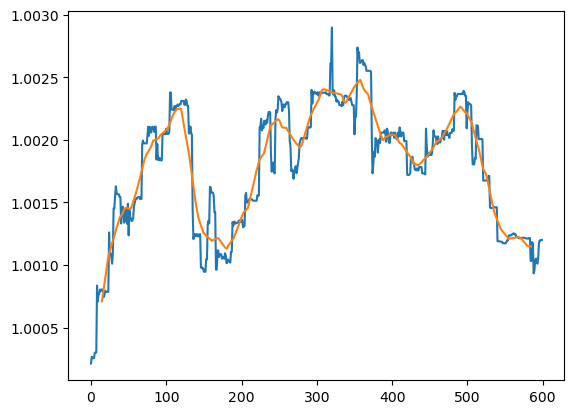

In [165]:
last = 600
plt.plot(temp['seconds_in_bucket'].iloc[:last],temp['stock_13.csv'].iloc[:last])
plt.plot(rolling30['seconds_in_bucket'].iloc[:last],rolling30['stock_13.csv'].iloc[:last])

In [257]:
values = clean[clean['time_id'] == 11].iloc[:,2:].to_numpy()
values

array([[1.00082922, 0.99989862, 1.0012922 , ..., 1.00044023, 1.00010359,
        0.99967628],
       [1.00082922, 0.99989862, 1.0012922 , ..., 1.00044307, 1.00010359,
        0.99968947],
       [1.00082644, 0.99989862, 1.0012922 , ..., 1.00044307, 1.00019896,
        0.99968924],
       ...,
       [1.0012338 , 0.99854434, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715],
       [1.00123432, 0.99854434, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715],
       [1.00123432, 0.99841884, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715]])

In [258]:
after = values[1:]
after

array([[1.00082922, 0.99989862, 1.0012922 , ..., 1.00044307, 1.00010359,
        0.99968947],
       [1.00082644, 0.99989862, 1.0012922 , ..., 1.00044307, 1.00019896,
        0.99968924],
       [1.00061318, 0.99989862, 1.0012922 , ..., 1.00049757, 1.00019962,
        0.99939652],
       ...,
       [1.0012338 , 0.99854434, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715],
       [1.00123432, 0.99854434, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715],
       [1.00123432, 0.99841884, 1.00490083, ..., 1.00299555, 0.99975679,
        1.00188715]])

In [259]:
before = values[:-1]

In [260]:
diff = after - before

In [261]:
diff

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.84108505e-06,  0.00000000e+00,  1.31902461e-05],
       [-2.78965989e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  9.53691368e-05, -2.26443815e-07],
       [-2.13252719e-04,  0.00000000e+00,  0.00000000e+00, ...,
         5.44979411e-05,  6.67104112e-07, -2.92722708e-04],
       ...,
       [-5.27735165e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.27735165e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.25497468e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [280]:
for column in range(diff.shape[1]):
    stock = diff[:,column]
    stock = stock[~np.isnan(stock)]
    # stock = np.round(8)
    stock = np.abs(stock)
    stock = stock[stock>0]

    tick = np.sort(stock)
    price_mult = 0.01/tick
    print(price_mult)
    break
    

[3.28961244e+05 3.28961244e+05 3.28961244e+05 3.28961244e+05
 3.28961244e+05 3.28961244e+05 2.81150196e+05 2.81150196e+05
 2.03532490e+05 2.03532490e+05 1.86141273e+05 1.86141273e+05
 1.82752376e+05 1.82752376e+05 1.58737782e+05 1.58737782e+05
 1.52250392e+05 1.52250392e+05 1.52250392e+05 1.52250392e+05
 1.52250392e+05 1.52250392e+05 1.52250392e+05 1.52250392e+05
 1.52250392e+05 1.52250392e+05 1.52250392e+05 1.52250392e+05
 1.52250392e+05 1.52250392e+05 1.39732953e+05 1.39732953e+05
 1.39732953e+05 1.39732953e+05 1.27234373e+05 1.27234373e+05
 1.20863497e+05 1.20863497e+05 1.20863497e+05 1.20863497e+05
 1.19901148e+05 1.19901148e+05 1.16148893e+05 1.16148893e+05
 1.13578493e+05 1.13578493e+05 1.13578493e+05 1.13578493e+05
 1.13251449e+05 1.13251449e+05 1.13251449e+05 1.13251449e+05
 1.09749099e+05 1.09749099e+05 1.08456087e+05 1.08456087e+05
 1.08456087e+05 1.08456087e+05 9.49065998e+04 9.49065998e+04
 8.89315756e+04 8.89315756e+04 7.98486854e+04 7.98486854e+04
 7.58626233e+04 7.586262

In [281]:
from matplotlib import pyplot as plt

(array([347.,  14.,  10.,  24.,  20.,   4.,   2.,   0.,   2.,   6.]),
 array([2.46853820e+01, 3.29183412e+04, 6.58119970e+04, 9.87056528e+04,
        1.31599309e+05, 1.64492964e+05, 1.97386620e+05, 2.30280276e+05,
        2.63173932e+05, 2.96067588e+05, 3.28961244e+05]),
 <BarContainer object of 10 artists>)

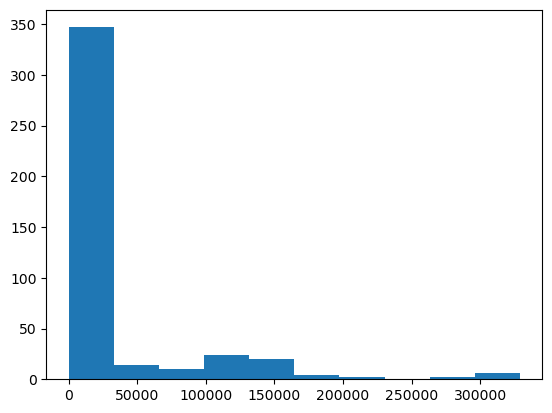

In [283]:
plt.hist(price_mult)